In [ ]:
from keras._tf_keras.keras.models import Sequential
from keras._tf_keras.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten ,Dense, Input
from keras._tf_keras.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
from glob import glob
from pathlib import Path
import os

train_path = '../fruits_dataset/fruits-360_dataset_100x100/fruits-360/Training'
test_path = '../fruits_dataset/fruits-360_dataset_100x100/fruits-360/Test'

model = Sequential([
    Input(shape=(100, 100, 3)),  # ✅ input_shape yerine Input() kullanılıyor
    Conv2D(32, (3, 3)),
    Activation('relu'),
    MaxPooling2D(),

    Conv2D(32, (3, 3)),
    Activation('relu'),
    MaxPooling2D(),

    Conv2D(64, (3, 3)),
    Activation('relu'),
    MaxPooling2D(),

    Flatten(),
    Dense(1024),
    Activation('relu'),
    Dropout(0.5),

    Dense(141),  # output = class sayısı
    Activation('softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer= 'rmsprop',
              metrics=["accuracy"])

batch_size = 32 # her iterasyonda 32 tane resim train edilecek

model.summary()

# Data Generation - Train - Test
Train_Datagen = ImageDataGenerator(rescale= 1./255, # rgb 0-255 arasında
                   shear_range= 0.3, #rastgele resmi sağa veya sola çevirme
                   horizontal_flip= True,
                   zoom_range= 0.3)

Test_Datagen = ImageDataGenerator(rescale= 1./255)



Train_Generator = Train_Datagen.flow_from_directory(train_path,                 
                                                    target_size= (100, 100),
                                                    batch_size= batch_size,
                                                    color_mode= 'rgb',
                                                    class_mode= 'categorical') # Belli bir kalıba uygunsa classları ve içindekileri otomatik okuma

Test_Generator = Train_Datagen.flow_from_directory(test_path,                 
                                                    target_size= (100, 100),
                                                    batch_size= batch_size,
                                                    color_mode= 'rgb',
                                                    class_mode= 'categorical')

hist = model.fit(
    Train_Generator,
    steps_per_epoch= 1600 // batch_size, # Yukarıda generator kısmında kaç tane resim üreticeğinin belirtmemiştik, 1600 tane resim lazım olarak belirledik 
    epochs= 4,
    validation_data= Test_Generator,
    validation_steps= 800 // batch_size
)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 98, 98, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 47, 47, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 47, 47, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 21, 21, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1024)           │     6,554,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_13 (Activation)      │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 141)            │       144,525 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_14 (Activation)      │ (None, 141)            │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,727,789 (25.66 MB)

 Trainable params: 6,727,789 (25.66 MB)

 Non-trainable params: 0 (0.00 B)

Found 70491 images belonging to 141 classes.
Found 23619 images belonging to 141 classes.
Epoch 1/4


/Users/fege/Documents/python_env2/env/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.0153 - loss: 4.9339 - val_accuracy: 0.0213 - val_loss: 4.4906
Epoch 2/4
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.0539 - loss: 4.3678 - val_accuracy: 0.1163 - val_loss: 3.8039
Epoch 3/4
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.1138 - loss: 3.6847 - val_accuracy: 0.2900 - val_loss: 2.7531
Epoch 4/4
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.1978 - loss: 3.0415 - val_accuracy: 0.3638 - val_loss: 2.4452


In [16]:
model.save_weights('deneme.weights.h5')

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


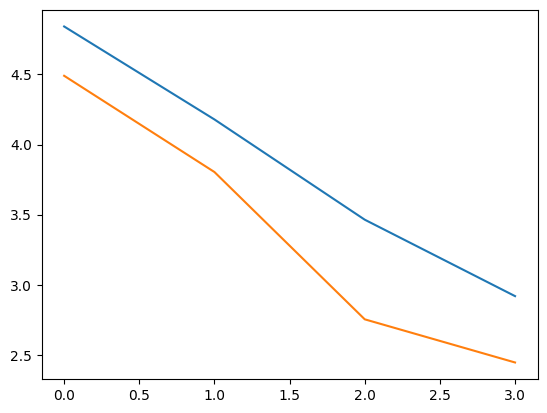

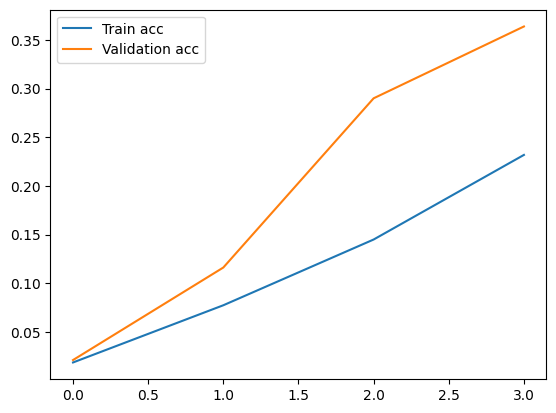

In [17]:
print(hist.history.keys())
plt.plot(hist.history['loss'], label = 'Train Loss')
plt.plot(hist.history['val_loss'], label = 'Validation Loss')
plt.figure()
plt.plot(hist.history['accuracy'], label = 'Train acc')
plt.plot(hist.history['val_accuracy'], label = 'Validation acc')
plt.legend()
plt.show()

In [18]:
import json
with open("deneme.json","w") as f:
    json.dump(hist.history, f)

In [19]:
import codecs
with codecs.open("../model_saves/model-4-2-2025-19:3:22.json","r",encoding="utf-8") as f:
    h = json.loads(f.read())

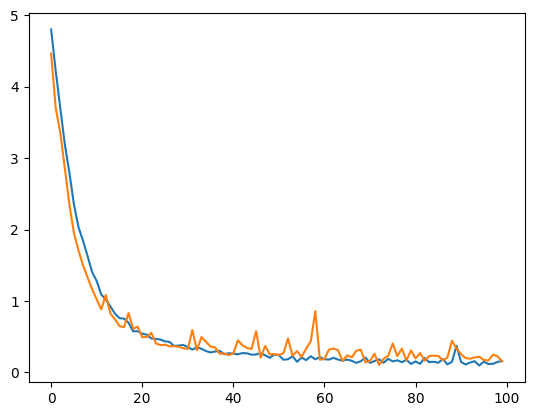

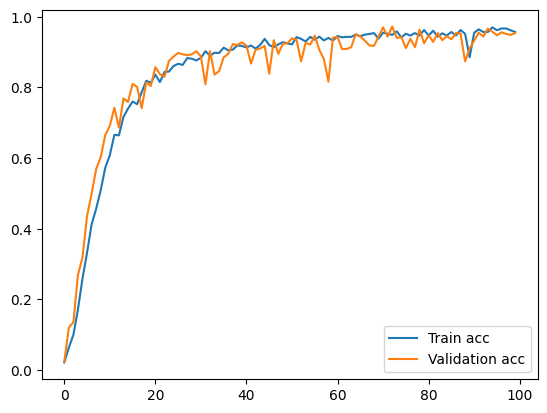

In [20]:
plt.plot(h['loss'], label = 'Train Loss')
plt.plot(h['val_loss'], label = 'Validation Loss')
plt.figure()
plt.plot(h['accuracy'], label = 'Train acc')
plt.plot(h['val_accuracy'], label = 'Validation acc')
plt.legend()
plt.show()

In [26]:
max(h['val_accuracy'])

0.9725000262260437